In [1]:
import cv2
import random
from PIL import Image
import numpy as np
from IPython.display import display

In [2]:
def show(img):
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return Image.fromarray(img2)

In [3]:
def myFilter(img,mask):
    newImage = np.copy(img)
    
    ijStart = mask.shape[0] // 2
    img = cv2.copyMakeBorder(img, ijStart, ijStart, ijStart, ijStart, cv2.BORDER_REPLICATE)
    
    for i in range(0,newImage.shape[0]):
        for j in range(0,newImage.shape[1]):
            
            frame = img[i:i+ijStart*2+1,j:j+ijStart*2+1]
            br = int(round(np.sum(mask*frame))) 
            
            if br > 250: br=250
            elif br < 0: br=0
                
            newImage[i,j] = br
            
    return newImage

In [4]:
def myNoisePer(img,per):
    newImage = np.copy(img)
    countOfPixels = int(img.shape[0]*img.shape[1]/100*per)
    for c in range(countOfPixels):
        i = random.randint(0,img.shape[0]-1)
        j = random.randint(0,img.shape[1]-1)
        newImage[i,j] = [random.choice([0,255]),random.choice([0,255]),random.choice([0,255])]
    return newImage

In [5]:
def B(A, B, k, l):
    rows = A.shape[0]
    cols = A.shape[1]

    if k < 0 and l < 0:
        return np.sum(np.sum(A[0:rows - abs(k), 0:cols - abs(l)] * B[abs(k):rows, abs(l):cols])) / (
                (rows - 1) * (cols - 1))

    elif k < 0 and l >= 0:
        return np.sum(np.sum(A[0:rows - abs(k), l:cols] * B[abs(k):rows, 0:cols - l])) / ((rows - 1) * (cols - 1))

    elif k >= 0 and l < 0:
        return np.sum(np.sum(A[k:rows, 0:cols - abs(l)] * B[0:rows - k, abs(l):cols])) / ((rows - 1) * (cols - 1))

    return np.sum(np.sum(A[k:rows, l:cols] * B[0:rows - k, 0:cols - l])) / ((rows - 1) * (cols - 1))

In [6]:
def WienerHFilter(img,imgNoise,D):
    bCrossCor = []
    bAutoCor = []
    
    for n in D:
        for m in D:
            bCrossCor.append(B(img, imgNoise, n, m))
            for k in D:
                for l in D:
                    bAutoCor.append(B(imgNoise, imgNoise, n - k, m - l))

    bAutoCor = np.array(bAutoCor).reshape(len(D)**2, len(D)**2)
    
    mask = np.linalg.solve(bAutoCor, bCrossCor)

    return np.array(mask).reshape(len(D), len(D))

In [7]:
def getError(img1, img2):
    img1 = img1/255
    img2 = img2/255
    error = (np.sum((np.array(img1.flatten()) - np.array(img2.flatten())) ** 2) / (img1.shape[0] * img2.shape[1] * 3)) ** 0.5
    return error

In [8]:
def doLab(src):
    img = cv2.imread(src) 
    
    D = [1, 2, 3]
    
    imgNoisy = myNoisePer(img, 14)
    
    b, g, r = cv2.split(img)
    bNoise, gNoise, rNoise = cv2.split(imgNoisy)
    
    rF = WienerHFilter(r,rNoise,D)
    print(rF)
    gF = WienerHFilter(g,gNoise,D)
    print(gF)
    bF = WienerHFilter(b,bNoise,D)
    print(bF)
    
    rOut = myFilter(rNoise, rF)
    gOut = myFilter(gNoise, gF)
    bOut = myFilter(bNoise, bF)
    
    newImg = cv2.merge((bOut, gOut, rOut))
    cv2.imwrite("out"+src, newImg)
    
    display(show(img),show(imgNoisy),show(newImg))
    
    print("Error (noise image): ", getError(img, imgNoisy))
    print("Error (after filter): ", getError(img, newImg))

[[0.10273098 0.10622496 0.0961732 ]
 [0.08021493 0.12617828 0.1272875 ]
 [0.11370848 0.15896468 0.15807259]]
[[0.16763391 0.1243778  0.13688061]
 [0.08434347 0.05904277 0.12036502]
 [0.09737352 0.10941505 0.17129695]]
[[0.0895824  0.10338878 0.13316335]
 [0.10544355 0.12099637 0.13087663]
 [0.08492682 0.1168701  0.17805123]]


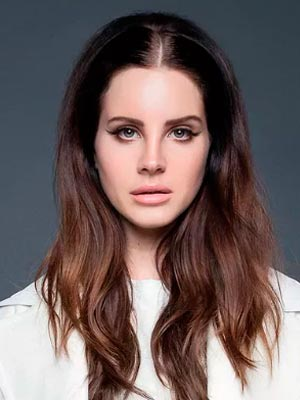

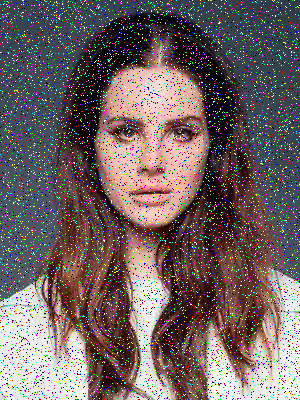

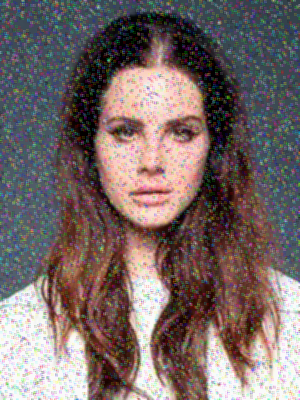

Error (noise image):  0.21180577448132848
Error (after filter):  0.0931343476211766


In [9]:
doLab("lana.jpg")

[[ 0.00175164 -0.06380801  0.02574139]
 [ 0.07155224  0.10410308  0.24637985]
 [ 0.18551823  0.22793572  0.31104587]]
[[0.05505864 0.05611664 0.12054447]
 [0.11162004 0.10755889 0.12904714]
 [0.17476304 0.16117957 0.1905232 ]]
[[0.04397363 0.0622591  0.09563341]
 [0.11086584 0.12863807 0.1467238 ]
 [0.13542683 0.18192418 0.19707336]]


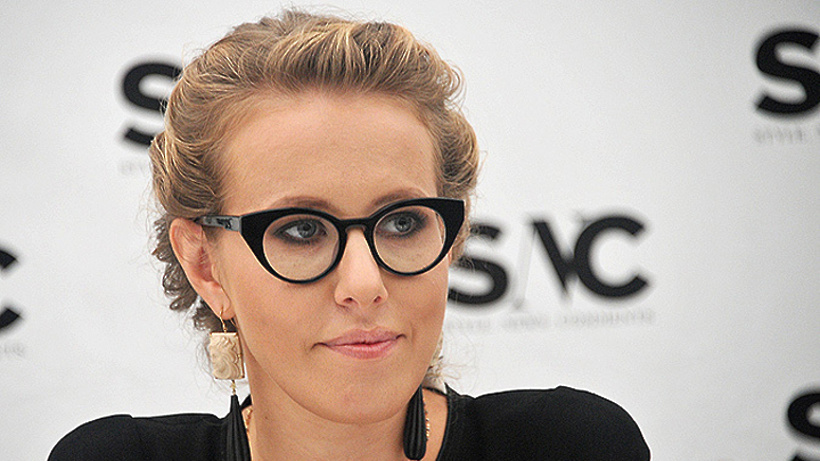

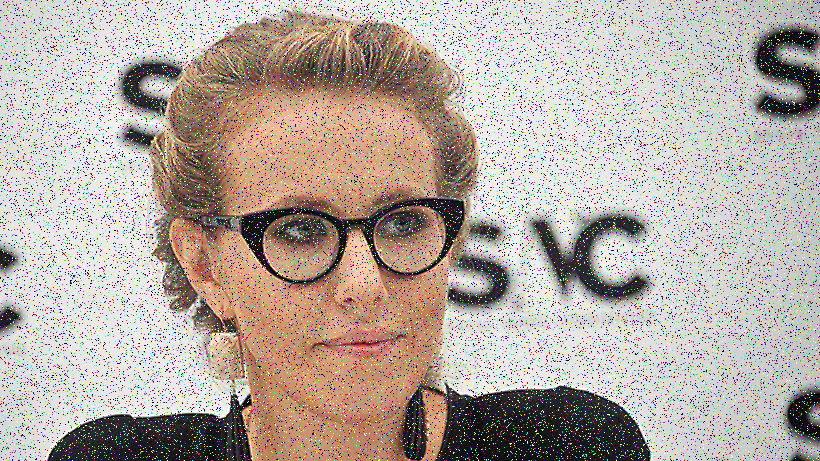

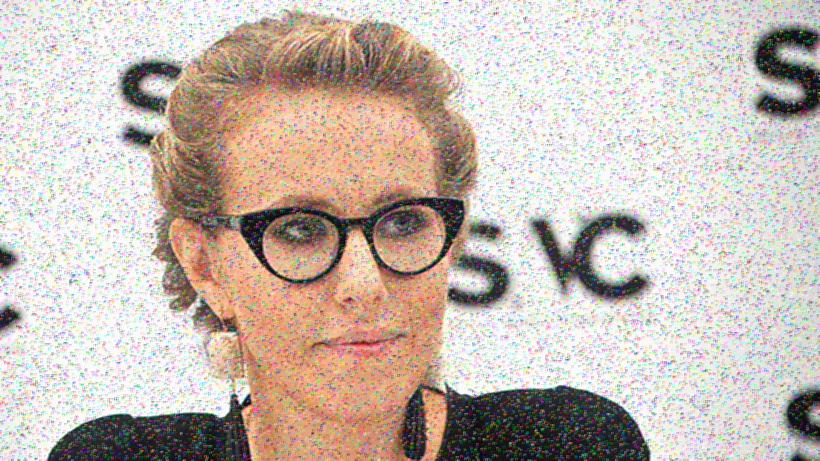

Error (noise image):  0.21730450910960084
Error (after filter):  0.10257244046460566


In [10]:
doLab("ksy.jpg")

[[0.11909454 0.12590085 0.12796302]
 [0.13221183 0.13359963 0.1220333 ]
 [0.10632568 0.10266997 0.10662886]]
[[0.09529919 0.15169364 0.13654776]
 [0.09643296 0.11313507 0.11767397]
 [0.1019935  0.12652691 0.12907299]]
[[0.16476226 0.1195617  0.11129174]
 [0.12629852 0.11012827 0.10917783]
 [0.11837978 0.10577284 0.11195834]]


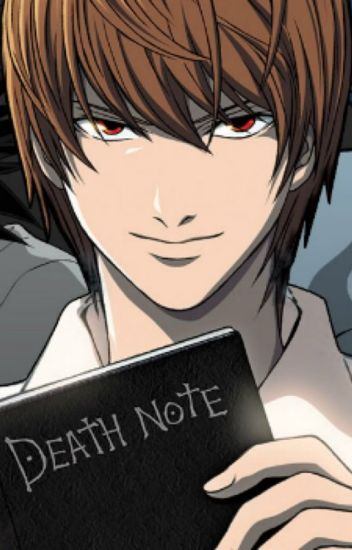

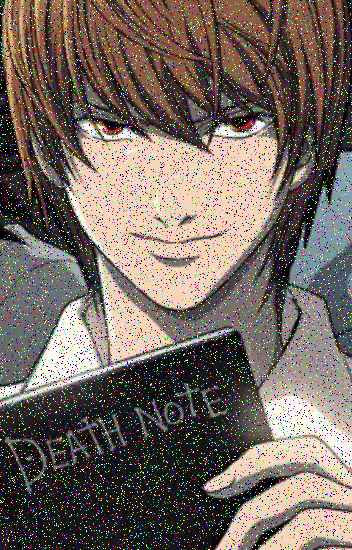

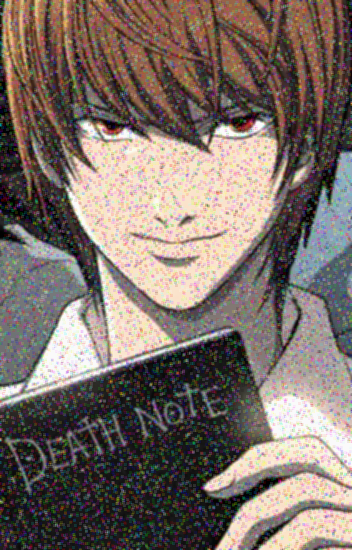

Error (noise image):  0.21489242446454204
Error (after filter):  0.09386073937780402


In [11]:
doLab("yl.jpg")

[[0.09585818 0.09023817 0.11239494]
 [0.1176133  0.12330547 0.14345455]
 [0.11325771 0.12309367 0.17301528]]
[[0.143394   0.06912253 0.10647826]
 [0.12664743 0.09734583 0.15895419]
 [0.10441031 0.12671072 0.15842977]]
[[0.10682127 0.0940041  0.11140493]
 [0.11888713 0.1226518  0.14993078]
 [0.10904606 0.11448385 0.1631547 ]]


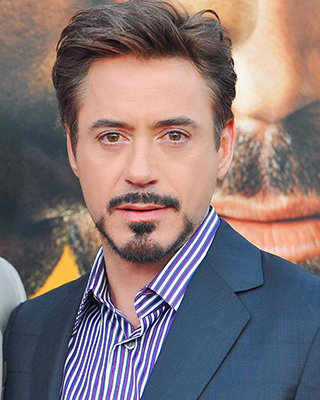

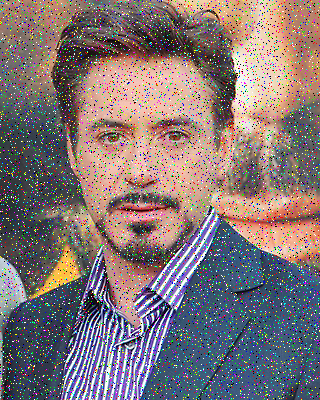

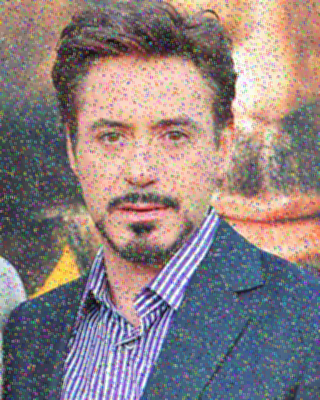

Error (noise image):  0.19907348861338706
Error (after filter):  0.10328648511386533


In [12]:
doLab("tony.jpg")